In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

%matplotlib inline

2023-11-09 14:33:50.158100: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 14:33:50.201691: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 14:33:50.201728: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 14:33:50.201774: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 14:33:50.209486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 14:33:50.209864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
df = pd.read_csv('Bitcoin prices.csv')
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3318 non-null   object 
 1   Open       3318 non-null   float64
 2   High       3318 non-null   float64
 3   Low        3318 non-null   float64
 4   Close      3318 non-null   float64
 5   Adj Close  3318 non-null   float64
 6   Volume     3318 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 181.6+ KB
None
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3318 entries, 2014-09-18 to 2023-10-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3318 non-null   float64
 1   High       3318 non-null   float64
 2   Low        3318 non-null   float64
 3   Close      3318 non-null   float64
 4   Adj Close  3318 non-null   float64
 5   Volume     3318 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 181.5 KB


Text(0.5, 0, 'Days')

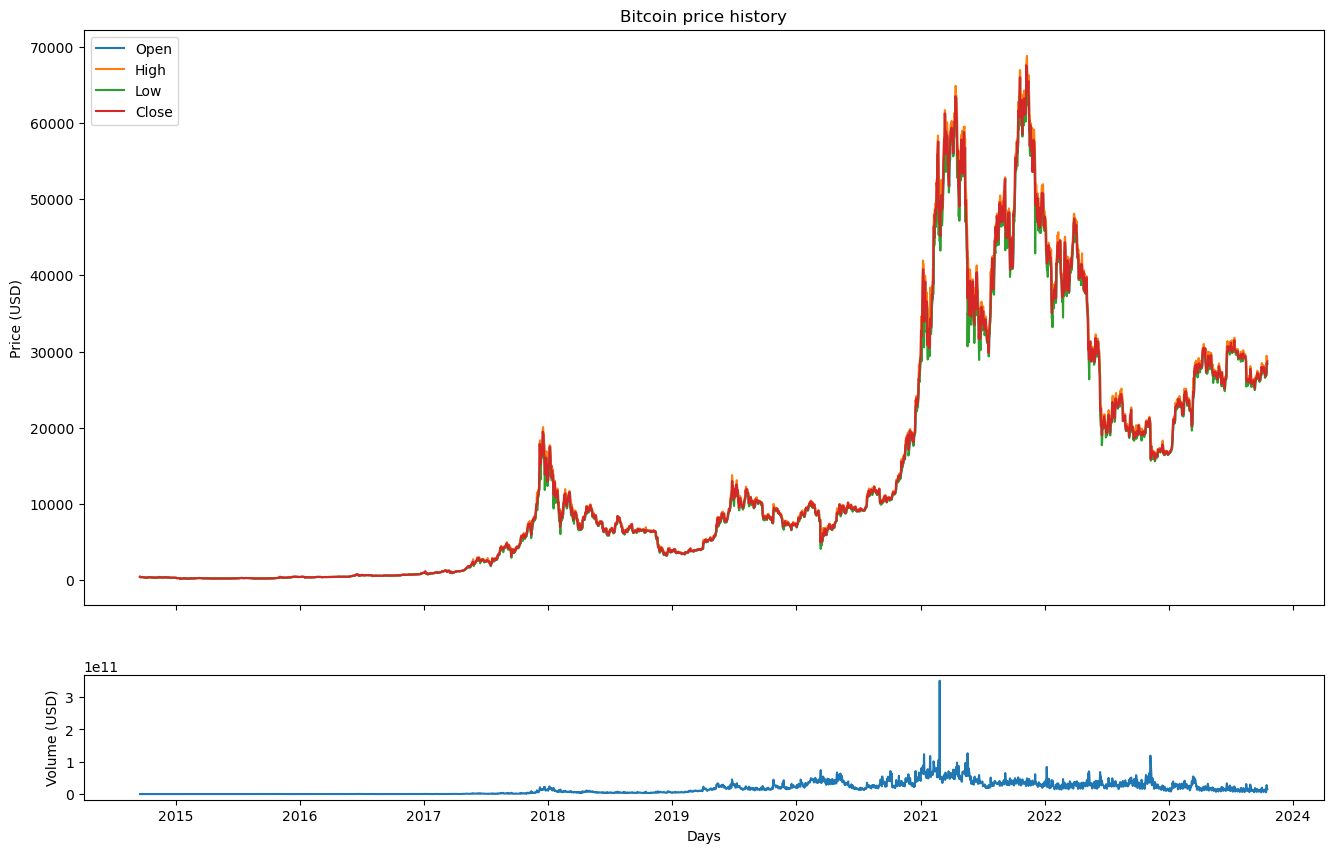

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [6, 1.3]}, figsize=(16, 10))

ax1.plot(df["Open"])
ax1.plot(df["High"])
ax1.plot(df["Low"])
ax1.plot(df["Close"])
ax1.set_title('Bitcoin price history')
ax1.set_ylabel('Price (USD)')
ax1.legend(['Open','High','Low','Close'], loc='upper left')

ax2.plot(df['Volume'])
ax2.set_ylabel('Volume (USD)')
ax2.set_xlabel('Days')




In [6]:
# Create a dataframe with only the Close Stock Price Column
data_target = df.filter(['Close'])

# Convert the dataframe to a numpy array to train the LSTM model
target = data_target.values
print(target)
# Splitting the dataset into training and test
# Target Variable: Close stock price value

training_data_len = round(len(target)* 0.8) # training set has 80% of the data
print(training_data_len)

# Normalizing data before model fitting using MinMaxScaler
# Feature Scaling

sc = MinMaxScaler(feature_range=(0,1))
training_scaled_data = sc.fit_transform(target)
print(training_scaled_data)
print("Min:", np.min(training_scaled_data))
print("Max:", np.max(training_scaled_data))

[[  424.440002]
 [  394.79599 ]
 [  408.903992]
 ...
 [28519.466797]
 [28415.748047]
 [28701.488281]]
2654
[[0.00365546]
 [0.00321557]
 [0.00342492]
 ...
 [0.42056537]
 [0.41902625]
 [0.42326643]]
Min: 0.0
Max: 1.0


In [7]:
train_data = training_scaled_data[0:training_data_len  , : ]

X_train = []
y_train = []
for i in range(180, len(train_data)):
    X_train.append(train_data[i-180:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) # converting into numpy sequences to train the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)  #(854 values, 180 time-steps, 1 output)

Number of rows and columns:  (2474, 180, 1)


In [12]:

model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 30))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
39/39 [==============================] - 15s 207ms/step - loss: 0.0173
Epoch 2/10
39/39 [==============================] - 8s 208ms/step - loss: 0.0027
Epoch 3/10
39/39 [==============================] - 9s 221ms/step - loss: 0.0023
Epoch 4/10
39/39 [==============================] - 9s 225ms/step - loss: 0.0021
Epoch 5/10
39/39 [==============================] - 9s 226ms/step - loss: 0.0022
Epoch 6/10
39/39 [==============================] - 9s 224ms/step - loss: 0.0023
Epoch 7/10
39/39 [==============================] - 9s 225ms/step - loss: 0.0020
Epoch 8/10
39/39 [==============================] - 9s 225ms/step - loss: 0.0019
Epoch 9/10
39/39 [==============================] - 9s 228ms/step - loss: 0.0020
Epoch 10/10
39/39 [==============================] - 9s 227ms/step - loss: 0.0020


In [32]:
# Getting the predicted stock price
test_data = training_scaled_data[training_data_len - 180: , : ]

#Create the x_test and y_test data sets
X_test = []
y_test =  target[training_data_len : , : ]
for i in range(180,len(test_data)):
    X_test.append(test_data[i-180:i,0])

# Convert x_test to a numpy array
X_test = np.array(X_test)

#Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print('Number of rows and columns: ', X_test.shape)

Number of rows and columns:  (664, 180, 1)


In [33]:
# Making predictions using the test dataset
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


21/21 [==============================] - 1s 43ms/step


/tmp/ipykernel_17916/1495395229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_stock_price


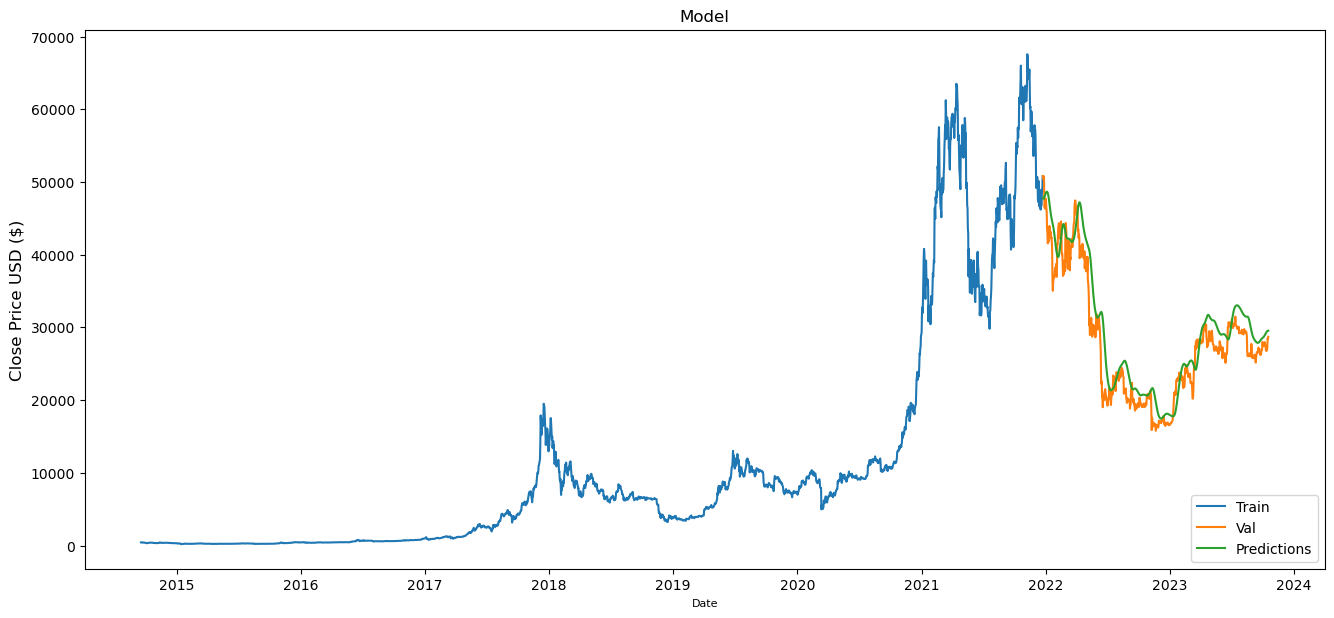

In [34]:
# Visualising the results
train = data_target[:training_data_len]
valid = data_target[training_data_len:]
valid['Predictions'] = predicted_stock_price
plt.figure(figsize=(16,7))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')


In [81]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 2654 to 3317
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        664 non-null    float64
 1   Predictions  664 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 7.9 KB
